<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
LDA
</h1><center/>

Linear Discriminant Analysis (LDA) is a a supervised learning algorithm commonly used for dimensionality reduction like PCA and classification in machine learning and statistics.

It is particularly useful when there are more features than samples, as it can help identify the most informative features to reduce dimensionality while preserving relevant information ! (example : radiomics)

**Link to the article** : https://medium.com/ai-in-plain-english/linear-discriminant-analysis-lda-94aad4fb3e6d?sk=ed1ba5e52777b2eb077d9c5c0a94c095

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data = load_iris()
x = data.data
y = data.target
feature_names = data.feature_names

In [3]:
np.unique(y) #Categories

array([0, 1, 2])

In [4]:
lda = LinearDiscriminantAnalysis()
lda_transformed = lda.fit_transform(x, y)

In [5]:
explained_variance_ratio = lda.explained_variance_ratio_
print("Explained variance ratio for each LD:", explained_variance_ratio)

Explained variance ratio for each LD: [0.9912126 0.0087874]


In [6]:
coefficients = lda.coef_
print("LDA Coefficients:")
for feature_name, coef in zip(data.feature_names, coefficients.T):
    print(f"Feature '{feature_name}': {coef}")

LDA Coefficients:
Feature 'sepal length (cm)': [ 6.31475846 -1.53119919 -4.78355927]
Feature 'sepal width (cm)': [12.13931718 -4.37604348 -7.7632737 ]
Feature 'petal length (cm)': [-16.94642465   4.69566531  12.25075935]
Feature 'petal width (cm)': [-20.77005459   3.06258539  17.7074692 ]


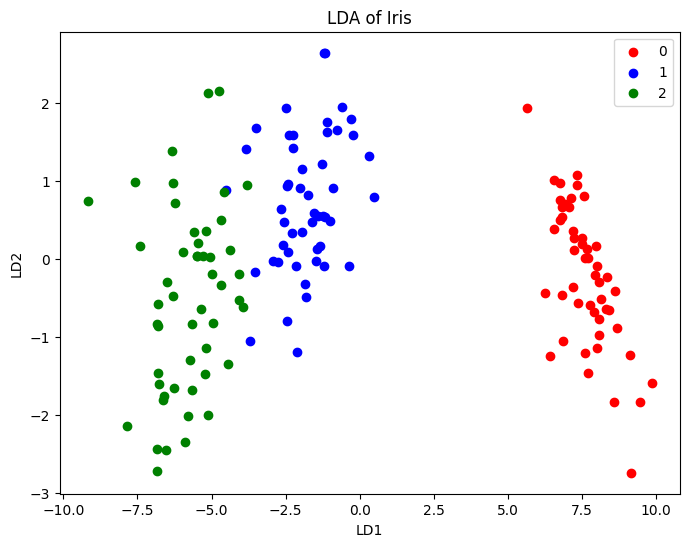

In [9]:
plt.figure(figsize=(8, 6))
for label, color in zip(np.unique(y), ['red', 'blue', 'green']):
    plt.scatter(lda_transformed[y == label, 0], lda_transformed[y == label, 1], color=color, label=label)
plt.title('LDA of Iris')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.show()

In [12]:
coefficients

array([[  6.31475846,  12.13931718, -16.94642465, -20.77005459],
       [ -1.53119919,  -4.37604348,   4.69566531,   3.06258539],
       [ -4.78355927,  -7.7632737 ,  12.25075935,  17.7074692 ]])

Feature 'sepal length (cm)': [ 6.31475846 -1.53119919 -4.78355927]
Feature 'sepal width (cm)': [12.13931718 -4.37604348 -7.7632737 ]
Feature 'petal length (cm)': [-16.94642465   4.69566531  12.25075935]
Feature 'petal width (cm)': [-20.77005459   3.06258539  17.7074692 ]


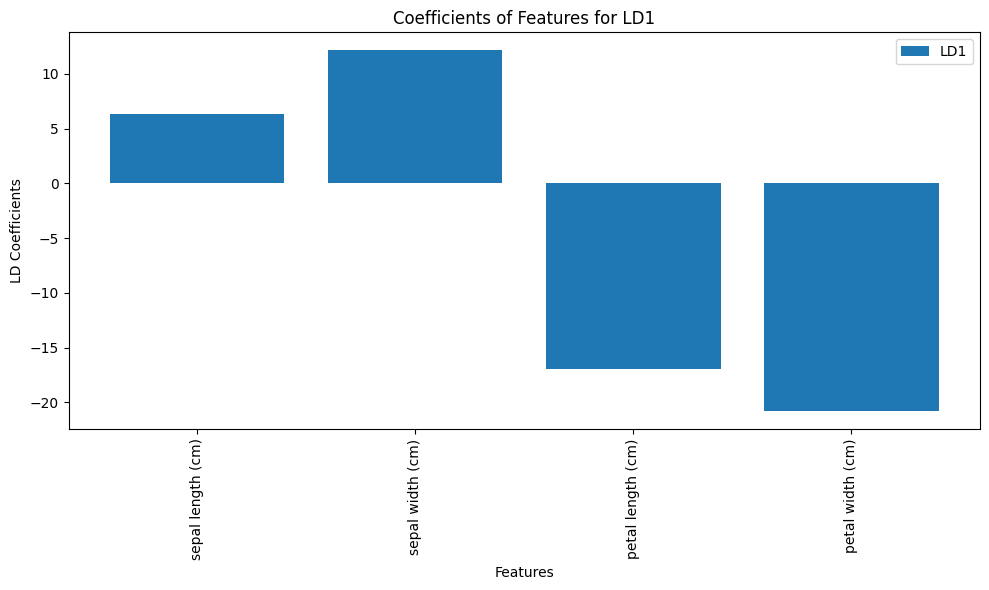

In [11]:
feature_names = data.feature_names
# Print feature contributions to each LD
for i, feature_name in enumerate(feature_names):
    print(f"Feature '{feature_name}': {coefficients[:, i]}")

# Optionally, you can plot the LD coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), coefficients[0], align='center', label='LD1')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('LD Coefficients')
plt.title('Coefficients of Features for LD1')
plt.legend()
plt.tight_layout()
plt.show()